In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
str = 'Sentinels fot the win'

In [3]:
str.index('n')

2

## Regular expression

In [4]:
import re

[0-9] - search for numbers between 0-9


In [5]:
str1 ='FNC-L234-W84732-Tier1-EU'

In [6]:
re.match('FNC',str1)

<re.Match object; span=(0, 3), match='FNC'>

In [7]:
re.match('G2',str1)  #Returns null if match not found

In [8]:
# To search in between
re.search('Tier1',str1)

<re.Match object; span=(16, 21), match='Tier1'>

In [9]:
# Span gives the index
str1[16:21]

'Tier1'

In [10]:
#Example ques 
eg='I like python'

In [11]:
re.search('python',eg)

<re.Match object; span=(7, 13), match='python'>

In [12]:
eg[7:13]

'python'

In [13]:
re.search('[0-9][0-9][0-9]',str1)  #Searching for 3 consecutive digits

<re.Match object; span=(5, 8), match='234'>

In [14]:
str1[5:8]

'234'

In [15]:
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.8/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

In [16]:
str3 = 'data science with python'

In [17]:
str3 = str3.replace('science','analytics')
str3

'data analytics with python'

In [18]:
#Alternative
str3 = re.sub('analytics','science',str3)
str3

'data science with python'

In [19]:
str3 = 'Data Science with Python Science'

In [20]:
re.subn('Science','Analytics',str3)

('Data Analytics with Python Analytics', 2)

RE on dataframe

In [21]:
df = pd.read_csv('SMSSpamCollection',sep='\t',header=0,names=['Label','Body'])

In [22]:
df.head()

,Label,Body
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5571 non-null   object
 1   Body    5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [24]:
df.shape #No null values

(5571, 2)

In [25]:
df.describe()

,Label,Body
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [26]:
pd.crosstab(index=df['Label'],columns='Count')

col_0,Count
Label,
ham,4824
spam,747


In [27]:
df.groupby(by='Label').describe()

Body                                                               
      count unique                                                top freq
Label                                                                     
ham    4824   4515                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [28]:
df['Length']= df['Body'].apply(len)
df.head()

,Label,Body,Length
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147


In [29]:
df.groupby(by='Label').describe()

Length                                                         
        count        mean        std   min    25%    50%    75%    max
Label                                                                 
ham    4824.0   71.474295  58.443940   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

<AxesSubplot:>

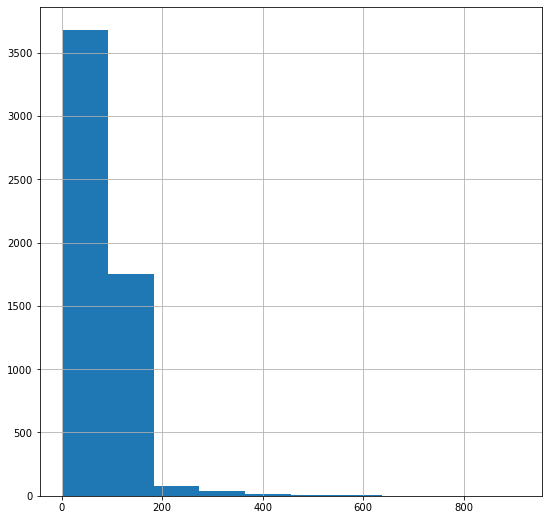

In [30]:
plt.figure(figsize=(9,9))
df['Length'].hist()

Label
ham     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
spam    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

<Figure size 648x648 with 0 Axes>

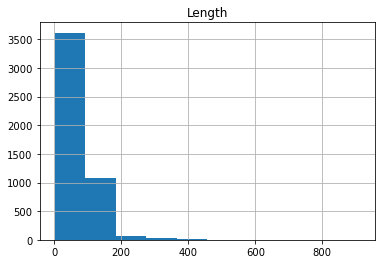

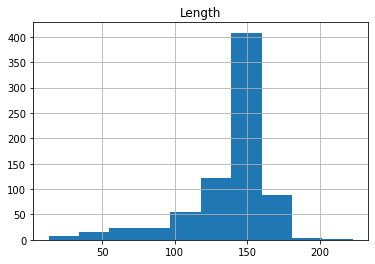

In [31]:
plt.figure(figsize=(9,9))
df.groupby(by='Label').hist()


In [32]:
# No particular relation b/w length and Label
df[df['Label']=='spam']

,Label,Body,Length
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147
7,spam,WINNER!! As a valued network customer you have...,157
8,spam,Had your mobile 11 months or more? U R entitle...,154
10,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
...,...,...,...
5536,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
5539,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
5546,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
5565,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147


## Various methods to deal with strings

# Punctuation removal

In [33]:
# Removing punctuation marks before applying RE
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
str = '   the hou$se is in th-e si;-de of t/he ri[ve}r'

In [35]:
y=[x for x in str if x not in string.punctuation]
y

[' ',
 ' ',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'h',
 'o',
 'u',
 's',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'i',
 'd',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'r',
 'i',
 'v',
 'e',
 'r']

In [36]:
''.join(y)

'   the house is in the side of the river'

# Stopwords removal

In [37]:
#Stopwords like I, you , me etc
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Function for both punctuation and stopwords removal

In [39]:
def clean_words(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [char for char in no_punc.lower().split() if char not in stopwords.words('english')]

In [40]:
sen = "The name o{f the !..course which I hav?e been study!ing is data science "
clean_words(sen)

['name', 'course', 'studying', 'data', 'science']

In [41]:
sen1 = 'I read Statistical Applications by Hastie. I have been reading it for 2 weeks very well'
sen1

'I read Statistical Applications by Hastie. I have been reading it for 2 weeks very well'

# Stemming - to get to the root word

In [42]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [43]:
stemmer.stem('driving')

'drive'

In [44]:
stemmer.stem('driving')

'drive'

# Lemmatizing
Root of a word wrt part of speech ( like adjective )

In [45]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [46]:
# Root of better (good ,better, best) ... pos - part of speech here a stands for adjective
lemmatizer.lemmatize('better',pos='a')

'good'

In [47]:
df['Clean_Words'] = df['Body'].apply(clean_words)
df.head()

,Label,Body,Length,Clean_Words
0,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goes, usf, lives, around, t..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147,"[freemsg, hey, darling, 3, weeks, word, back, ..."


In [48]:
df.head(15)

,Label,Body,Length,Clean_Words
0,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goes, usf, lives, around, t..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147,"[freemsg, hey, darling, 3, weeks, word, back, ..."
5,ham,Even my brother is not like to speak with me. ...,77,"[even, brother, like, speak, treat, like, aids..."
6,ham,As per your request 'Melle Melle (Oru Minnamin...,160,"[per, request, melle, melle, oru, minnaminungi..."
7,spam,WINNER!! As a valued network customer you have...,157,"[winner, valued, network, customer, selected, ..."
8,spam,Had your mobile 11 months or more? U R entitle...,154,"[mobile, 11, months, u, r, entitled, update, l..."
9,ham,I'm gonna be home soon and i don't want to tal...,109,"[im, gonna, home, soon, dont, want, talk, stuf..."


# Token creation using CountVectorizer
Example

In [49]:
# Token creation for clean words 
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# Corpus - each entry of the document 
corpus=['This is the first class with SL',
        'This is the data science with python class of SL',
        'Machine Learning class with SL']
corpus        

['This is the first class with SL',
 'This is the data science with python class of SL',
 'Machine Learning class with SL']

In [51]:
# Converting the doc into tokens of one gram 
vectorizer = CountVectorizer(ngram_range=(1,1))

In [52]:
X = vectorizer.fit_transform(corpus)
X

<3x13 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [53]:
print(corpus)
X.toarray()

['This is the first class with SL', 'This is the data science with python class of SL', 'Machine Learning class with SL']


array([[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

The 0s and 1s indicate if the feature_name is present in that document/index string or not. Like every string contains 'class' so first element for each doc is 1

In [54]:
vectorizer.get_feature_names()

['class',
 'data',
 'first',
 'is',
 'learning',
 'machine',
 'of',
 'python',
 'science',
 'sl',
 'the',
 'this',
 'with']

In [55]:
# For dataframe

#Instance creation
vectorizer = CountVectorizer(ngram_range=(1,1),analyzer=clean_words)
bag_of_words = vectorizer

In [56]:
bag_of_words_transformed = bag_of_words.fit(df['Body'])

In [57]:
bag_of_words_transformed.vocabulary_

{'ok': 6004,
 'lar': 4895,
 'joking': 4663,
 'wif': 9101,
 'u': 8624,
 'oni': 6036,
 'free': 3570,
 'entry': 3151,
 '2': 416,
 'wkly': 9158,
 'comp': 2315,
 'win': 9115,
 'fa': 3289,
 'cup': 2540,
 'final': 3414,
 'tkts': 8396,
 '21st': 436,
 'may': 5343,
 '2005': 423,
 'text': 8231,
 '87121': 849,
 'receive': 6846,
 'questionstd': 6736,
 'txt': 8608,
 'ratetcs': 6789,
 'apply': 1241,
 '08452810075over18s': 72,
 'dun': 3001,
 'say': 7206,
 'early': 3022,
 'hor': 4218,
 'c': 1909,
 'already': 1129,
 'nah': 5691,
 'dont': 2906,
 'think': 8307,
 'goes': 3799,
 'usf': 8758,
 'lives': 5058,
 'around': 1292,
 'though': 8326,
 'freemsg': 3578,
 'hey': 4113,
 'darling': 2604,
 '3': 527,
 'weeks': 9021,
 'word': 9192,
 'back': 1441,
 'id': 4339,
 'like': 5008,
 'fun': 3645,
 'still': 7873,
 'tb': 8161,
 'xxx': 9332,
 'std': 7848,
 'chgs': 2144,
 'send': 7301,
 '£150': 9476,
 'rcv': 6801,
 'even': 3198,
 'brother': 1825,
 'speak': 7719,
 'treat': 8533,
 'aids': 1075,
 'patent': 6236,
 'per': 627

In [58]:
bow = bag_of_words_transformed.transform(df['Body'])

In [59]:
bow

<5571x9528 sparse matrix of type '<class 'numpy.int64'>'
	with 50085 stored elements in Compressed Sparse Row format>

# TFIDF - to get the relative weight for each token created using CountVectorizer 
### Term Frequency- no of times a word repeated in the obs 
### Inverse document freq- gives more importance to the rare words and penalises the common word 

In [60]:
# Output of COuntVectorizer is passed to TFIDF function

from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit_transform(bow)

In [61]:
# Prediction of the Label using Tfidf using Multinomial Naive Bayes (bcoz of huge data dimension)
#nb.fit(output of tfidf , y = output label)
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB().fit(tfidf,y=df['Label'])

In [62]:
# Divide data into train and test then PREDICTION is done
y_pred=nb_model.predict(tfidf)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [63]:
# Confusion Matrix
from sklearn.metrics import classification_report

In [64]:
print(classification_report(df['Label'],y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      4824
        spam       1.00      0.83      0.91       747

    accuracy                           0.98      5571
   macro avg       0.99      0.92      0.95      5571
weighted avg       0.98      0.98      0.98      5571



# Naive Bayes

In [65]:
#Pipeline - hierarchy of the processes which we will follow from left to right
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [66]:
pipeline = Pipeline([('bag_of_words',CountVectorizer(analyzer=clean_words)),
                     ( 'weight tfidf',TfidfTransformer()),
                     ('classification',MultinomialNB())])

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df['Body'],df['Label'],test_size=0.25)

In [68]:
# Fiting on training data
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function clean_words at 0x00000197A1C21AF0>)),
                ('weight tfidf', TfidfTransformer()),
                ('classification', MultinomialNB())])

In [69]:
#Prediction
ypred = pipeline.predict(xtest)

In [70]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1200
        spam       1.00      0.71      0.83       193

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



# Random Forest 
(Just by changing the hyperparameter for pipeline)

In [71]:
pipeline = Pipeline([('bag_of_words',CountVectorizer(analyzer=clean_words)),
                     ( 'weight tfidf',TfidfTransformer()),
                     ('classification',RandomForestClassifier())])

In [72]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function clean_words at 0x00000197A1C21AF0>)),
                ('weight tfidf', TfidfTransformer()),
                ('classification', RandomForestClassifier())])

In [73]:
ypred = pipeline.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1200
        spam       1.00      0.77      0.87       193

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393

